In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv("credit_loan_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 20 columns):
Unnamed: 0                      12001 non-null int64
Loan ID                         12001 non-null object
Customer ID                     12001 non-null object
Loan Status                     12001 non-null object
Current Loan Amount             12001 non-null int64
Term                            12001 non-null object
Credit Score                    9223 non-null float64
Annual Income                   9223 non-null float64
Years in current job            11449 non-null object
Home Ownership                  12001 non-null object
Purpose                         12001 non-null object
Monthly Debt                    12001 non-null float64
Years of Credit History         12001 non-null float64
Months since last delinquent    5583 non-null float64
Number of Open Accounts         12001 non-null int64
Number of Credit Problems       12001 non-null int64
Current Credit Balance       

###### We will remove duplicate customer IDs to increase data accuracy

In [4]:
df = df.drop_duplicates('Customer ID')

###### Columns with Null values

In [5]:
df.columns[df.isnull().any()]

Index(['Credit Score', 'Annual Income', 'Years in current job',
       'Months since last delinquent', 'Bankruptcies'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9884 entries, 0 to 12000
Data columns (total 20 columns):
Unnamed: 0                      9884 non-null int64
Loan ID                         9884 non-null object
Customer ID                     9884 non-null object
Loan Status                     9884 non-null object
Current Loan Amount             9884 non-null int64
Term                            9884 non-null object
Credit Score                    7392 non-null float64
Annual Income                   7392 non-null float64
Years in current job            9427 non-null object
Home Ownership                  9884 non-null object
Purpose                         9884 non-null object
Monthly Debt                    9884 non-null float64
Years of Credit History         9884 non-null float64
Months since last delinquent    4493 non-null float64
Number of Open Accounts         9884 non-null int64
Number of Credit Problems       9884 non-null int64
Current Credit Balance          9884 non-nu

###### Credit Score and Annual Income are important factors and need to have the actual values. Our decision is to remove records with null values in these two columns

In [7]:
df = df.dropna(subset=['Credit Score','Annual Income'])

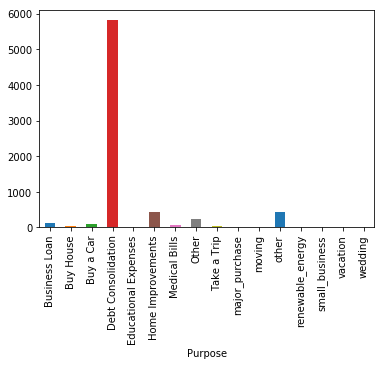

In [8]:
df.groupby('Purpose').count()['Loan Status'].plot(kind = 'bar')

###### Loan ID and Customer ID are not important columns for our analysis.

In [9]:
df.drop(['Loan ID','Customer ID'], axis = 1, inplace = True)

##### Months since last delinquent and Purpose of loan could be deciding factor, but based on the values and the variations here we consider them to be unimportant and drop them as well.

In [10]:
df.drop('Months since last delinquent', axis = 1, inplace = True)
df.drop('Purpose', axis = 1, inplace = True)

In [11]:
df[['Loan Status','Term']].groupby('Term').count()

,Loan Status
Term,
Long Term,2008
Short Term,5384


In [12]:
df['Loan Status'] = df['Loan Status'].map({'Charged Off':0, 'Fully Paid':1}).astype(int)

In [13]:
df['Loan Status'].unique()

array([1, 0])

In [14]:
df[['Loan Status','Years in current job']].groupby('Years in current job').count()

,Loan Status
Years in current job,
1 year,437
10+ years,2292
2 years,651
3 years,633
4 years,447
5 years,503
6 years,413
7 years,430
8 years,337


In [15]:
df['Years in current job'] = df['Years in current job'].map({'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8, '9 years':9, '10+ years':10})

In [16]:
df['Years in current job'] = df['Years in current job'].fillna(df['Years in current job'].median())

In [17]:
df['Years in current job'] = df['Years in current job'].astype(int)

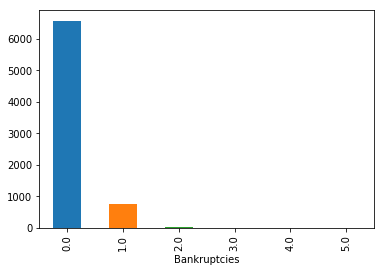

In [18]:
df.groupby('Bankruptcies').count()['Loan Status'].plot(kind = 'bar')

In [19]:
df['Bankruptcies'] = df['Bankruptcies'].fillna(0.0)

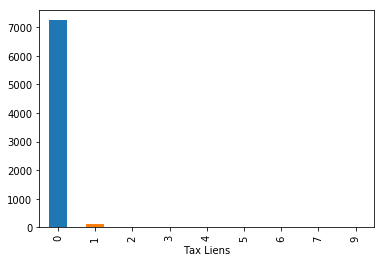

In [20]:
df.groupby('Tax Liens').count()['Loan Status'].plot(kind = 'bar')

In [21]:
df['Tax Liens'] = df['Tax Liens'].fillna(0.0)

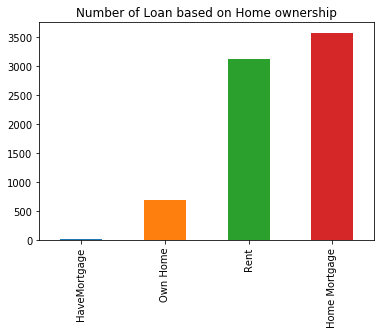

In [22]:
df['Home Ownership'].value_counts().sort_values(ascending = True).plot(kind='bar', title="Number of Loan based on Home ownership")

###### Categorical columns

In [23]:
cols = pd.get_dummies(df['Term'], prefix= 'Term')
df[cols.columns] = cols
df.drop('Term', axis = 1, inplace = True)

cols = pd.get_dummies(df['Home Ownership'], prefix= 'Home Ownership')
df[cols.columns] = cols
df.drop('Home Ownership', axis = 1, inplace = True)
             

In [24]:
df.head()

,Unnamed: 0,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,1,1,258082,746.0,950475.0,4,6748.42,11.5,12,0,330429,815782,0.0,0,0,1,0,0,0,1
2,3,1,260986,734.0,1314838.0,10,16325.94,30.3,7,0,189221,373890,0.0,0,0,1,0,0,1,0
5,6,1,353760,692.0,1202985.0,10,6115.15,13.8,10,0,173394,300564,0.0,0,1,0,0,0,0,1
8,9,1,134508,745.0,550620.0,6,3932.43,17.8,8,1,109668,307450,1.0,0,0,1,0,1,0,0
9,10,1,175208,750.0,1648915.0,10,1071.79,22.0,7,0,75221,1404964,0.0,0,0,1,0,0,1,0


###### Review statistics for each column

In [25]:
df.describe()

,Unnamed: 0,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
count,7392.000000,7392.000000,7392.000000,7392.000000,7.392000e+03,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7.392000e+03,7.392000e+03,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000
mean,6009.732143,0.761228,310033.949405,718.006899,1.378539e+06,5.877435,18308.151216,18.177611,11.124324,0.165449,2.952390e+05,7.417375e+05,0.116748,0.031656,0.271645,0.728355,0.002029,0.484172,0.091991,0.421807
std,3462.403835,0.426362,184640.319595,28.397136,1.013503e+06,3.555520,12118.585920,6.960855,5.013211,0.486130,3.787879e+05,3.924000e+06,0.353242,0.276875,0.444838,0.444838,0.045004,0.499783,0.289033,0.493881
min,1.000000,0.000000,11242.000000,585.000000,1.112450e+05,0.000000,0.000000,3.700000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3029.000000,1.000000,171660.500000,705.000000,8.404222e+05,3.000000,10117.500000,13.500000,8.000000,0.000000,1.116392e+05,2.763860e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6006.500000,1.000000,266266.000000,725.000000,1.167788e+06,6.000000,16133.945000,16.900000,10.000000,0.000000,2.103965e+05,4.682920e+05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,8985.250000,1.000000,430259.500000,740.000000,1.652074e+06,10.000000,23606.835000,21.700000,14.000000,0.000000,3.649852e+05,7.922805e+05,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,12001.000000,1.000000,789184.000000,751.000000,3.647544e+07,10.000000,173265.560000,59.700000,56.000000,9.000000,1.274640e+07,2.655129e+08,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df['Credit Score'] = df['Credit Score'].apply(lambda val: 0  if np.isreal(val) and val < 650 else val)
df['Credit Score'] = df['Credit Score'].apply(lambda val: 1 if np.isreal(val) and  (val >= 650 and val < 700) else val)
df['Credit Score'] = df['Credit Score'].apply(lambda val: 2 if np.isreal(val) and  (val >= 700 and val < 750) else val)
df['Credit Score'] = df['Credit Score'].apply(lambda val: 3 if np.isreal(val) and  (val >= 750 and val <= 850) else val)

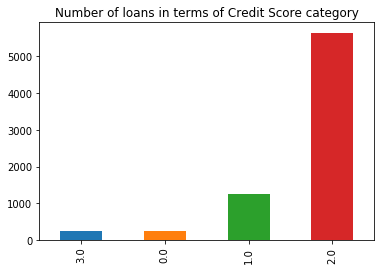

In [27]:
df['Credit Score'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Number of loans in terms of Credit Score category')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7392 entries, 0 to 12000
Data columns (total 20 columns):
Unnamed: 0                      7392 non-null int64
Loan Status                     7392 non-null int64
Current Loan Amount             7392 non-null int64
Credit Score                    7392 non-null float64
Annual Income                   7392 non-null float64
Years in current job            7392 non-null int64
Monthly Debt                    7392 non-null float64
Years of Credit History         7392 non-null float64
Number of Open Accounts         7392 non-null int64
Number of Credit Problems       7392 non-null int64
Current Credit Balance          7392 non-null int64
Maximum Open Credit             7392 non-null int64
Bankruptcies                    7392 non-null float64
Tax Liens                       7392 non-null int64
Term_Long Term                  7392 non-null uint8
Term_Short Term                 7392 non-null uint8
Home Ownership_HaveMortgage     7392 non-null uint

###### Missing data has been imputed, dataset was cleaned and Categorical variables have been taken care of

In [29]:
df.head(10)

,Unnamed: 0,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,1,1,258082,2.0,950475.0,4,6748.42,11.5,12,0,330429,815782,0.0,0,0,1,0,0,0,1
2,3,1,260986,2.0,1314838.0,10,16325.94,30.3,7,0,189221,373890,0.0,0,0,1,0,0,1,0
5,6,1,353760,1.0,1202985.0,10,6115.15,13.8,10,0,173394,300564,0.0,0,1,0,0,0,0,1
8,9,1,134508,2.0,550620.0,6,3932.43,17.8,8,1,109668,307450,1.0,0,0,1,0,1,0,0
9,10,1,175208,3.0,1648915.0,10,1071.79,22.0,7,0,75221,1404964,0.0,0,0,1,0,0,1,0
10,11,1,77176,2.0,1618629.0,10,7229.88,28.6,6,0,221217,560472,0.0,0,0,1,0,1,0,0
12,13,1,642202,2.0,1759533.0,2,23020.59,13.8,11,0,445987,733546,0.0,0,0,1,0,0,0,1
15,16,1,155496,2.0,664753.0,6,8087.92,21.3,7,1,79382,150700,1.0,0,0,1,0,0,1,0
17,18,1,463650,2.0,1642303.0,10,41878.47,18.0,22,0,401565,756052,0.0,0,0,1,0,0,0,1
20,21,0,325688,2.0,1181325.0,1,18507.33,12.9,10,0,194617,338888,0.0,0,0,1,0,0,0,1


In [30]:
df.shape

(7392, 20)

##### Splitting data into Training & Test

In [31]:
y = df['Loan Status']
X = df.drop(['Loan Status'],axis=1)

###### Min Max Scaler

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [33]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

##### KNN Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,25):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

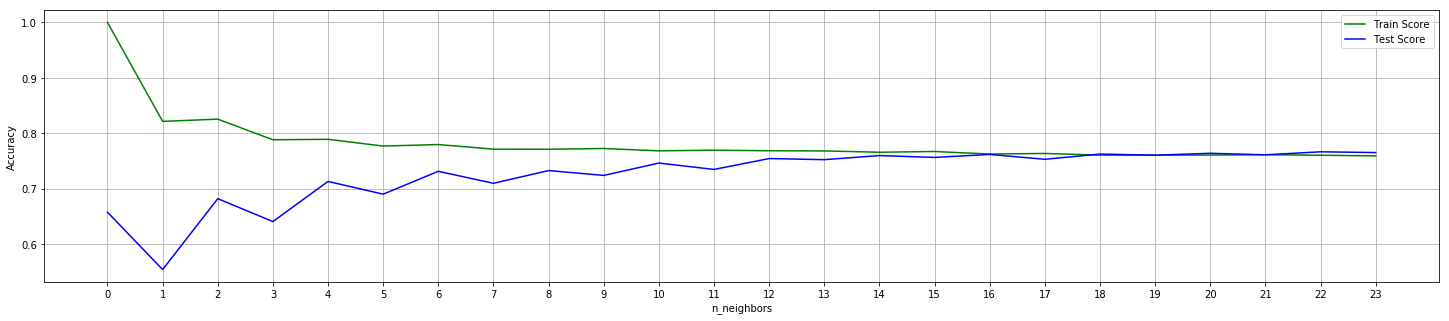

In [35]:
x_axis = range(1,25)
%matplotlib inline

plt.subplots(figsize = (25,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(x_axis, np.arange(25))
plt.grid()
plt.legend()

In [36]:
position_max = test_score_array.index(max(test_score_array))
print(position_max)
print(train_score_array[position_max])
print(test_score_array[position_max])

22
0.7605276509386099
0.7667342799188641


The best KNN classifer uses a k of 22. 

##### Logistic Regression 

In [37]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 5000, random_state=42)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 5000, random_state=42)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

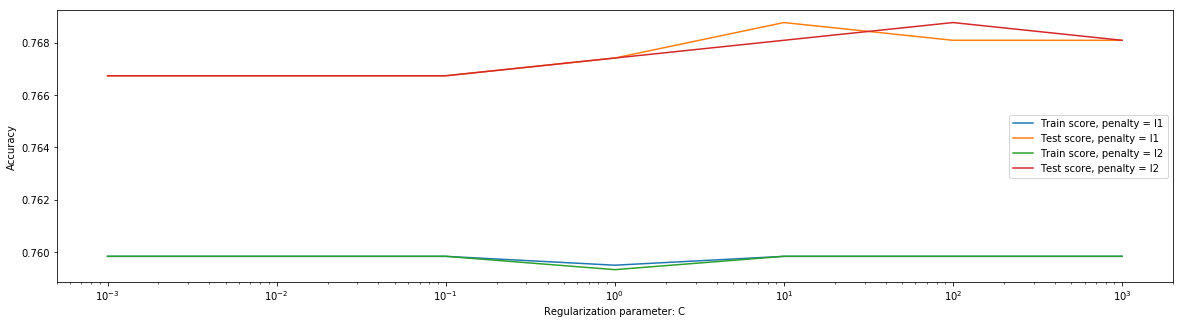

In [38]:
plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [39]:
position_max_l1 = test_score_l1.index(max(test_score_l1))
print(position_max_l1)
print(train_score_l1[position_max_l1])
print(test_score_l1[position_max_l1])

4
0.7598511753762895
0.768762677484787


In [40]:
position_max_l2 = test_score_l2.index(max(test_score_l2))
print(position_max_l2)
print(train_score_l2[position_max_l2])
print(test_score_l2[position_max_l2])

5
0.7598511753762895
0.768762677484787


Logistic regression using L1 and L2 regularization yielded the same results. For L1 regularization, the best C hyperparameter was 10. For L2, the best C hyperparameter was 100. 

##### Decision Tree Classifier

In [41]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X_train_org, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_org, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_org, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.643


In [42]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train_org, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_org, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_org, y_test)))

Accuracy on training set: 0.761
Accuracy on test set: 0.766


In [43]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    clf = DecisionTreeClassifier(random_state=42,max_depth=k)
    clf.fit(X_train_org, y_train)

    train_score_array.append(clf.score(X_train_org, y_train))
    test_score_array.append(clf.score(X_test_org, y_test))

Text(0,0.5,'Score')

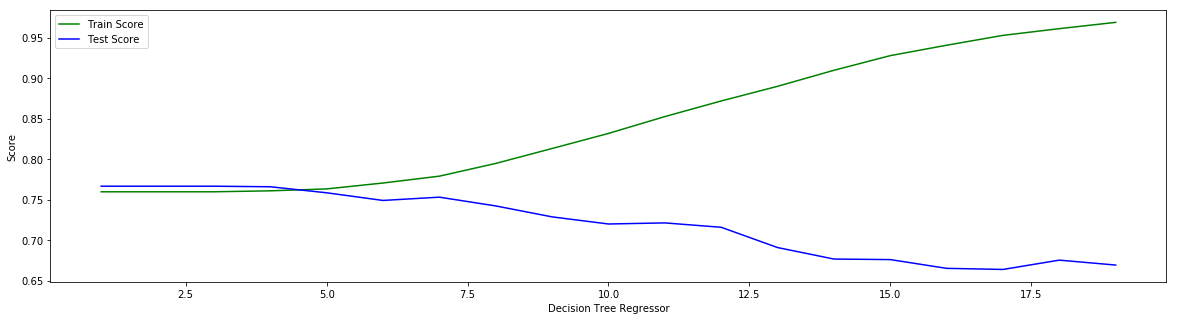

In [44]:
x_axis = range(1,20)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Decision Tree Regressor')
plt.ylabel('Score')

In [45]:
print(train_score_array[4])
print(test_score_array[4])

0.7634026720784711
0.7586206896551724


The best Decision Tree Classifier used a max depth of 4. 

###### Linear Support Vector Machine

In [46]:
from sklearn.svm import LinearSVC

train_scores =[]
test_scores = []
x_range = [0.1, 1, 10, 100, 1000]

for i in x_range:
    clf1 = LinearSVC(random_state = 42, C = i)
    clf1.fit(X_train, y_train)
    train_scores.append(clf1.score(X_train, y_train))
    test_scores.append(clf1.score(X_test, y_test))
print('Train Score: ', train_scores)
print('Test Score: ', test_scores)

Train Score:  [0.7598511753762895, 0.7601894131574497, 0.7600202942668696, 0.7596820564857094, 0.4720108236089971]
Test Score:  [0.7667342799188641, 0.7667342799188641, 0.7674104124408384, 0.7667342799188641, 0.48884381338742394]


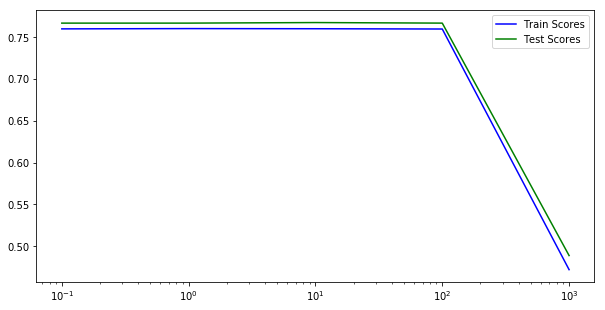

In [47]:
plt.figure(figsize=(10,5))
plt.plot(x_range, train_scores, color = 'blue', label = 'Train Scores')
plt.plot(x_range, test_scores, color = 'green', label = 'Test Scores')
plt.xscale('log')
plt.legend()

###### The best LinearSVC model uses a C hyperparameter of 10. 

In [48]:
clf1 = LinearSVC(random_state = 42, C = 10, max_iter = 10000)
clf1.fit(X_train, y_train)
print('Train Score: {:.4f}'.format(clf1.score(X_train, y_train)))
print('Test Score: {:.4f}'.format(clf1.score(X_test, y_test)))

Train Score: 0.7599
Test Score: 0.7674


###### Gridsearch Setup

In [49]:
param_grid = {'C': [100,1000,10000,100000, 1000000],
              'gamma': [0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [100, 1000, 10000, 100000, 1000000], 'gamma': [0.1, 1, 10, 100]}


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns

##### SVC - rbf

In [51]:
grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv=3, return_train_score=True, n_jobs = -1)

In [52]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [100, 1000, 10000, 100000, 1000000], 'gamma': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [83]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.76


In [53]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,6.596365,0.953043,0.206286,0.004588,100,0.1,"{'C': 100, 'gamma': 0.1}",0.759635,0.760020,0.759898,0.759851,0.000161,1,0.760974,0.760020,0.760081,0.760359,0.000436
1,3.329298,0.038993,0.263758,0.022418,100,1,"{'C': 100, 'gamma': 1}",0.732759,0.749873,0.728426,0.737020,0.009259,9,0.814007,0.804160,0.808521,0.808896,0.004028
2,1.943637,0.120725,0.216342,0.003985,100,10,"{'C': 100, 'gamma': 10}",0.659229,0.657027,0.659391,0.658549,0.001078,14,0.980969,0.982243,0.980472,0.981228,0.000746
3,1.234600,0.042922,0.369469,0.036628,100,100,"{'C': 100, 'gamma': 100}",0.738844,0.739726,0.748731,0.742432,0.004467,4,1.000000,1.000000,1.000000,1.000000,0.000000
4,14.535922,3.044522,0.192550,0.002029,1000,0.1,"{'C': 1000, 'gamma': 0.1}",0.755578,0.761035,0.757360,0.757991,0.002272,2,0.765795,0.761796,0.762871,0.763487,0.001690


([<matplotlib.axis.YTick at 0x2b8fffd02e10>,
 <a list of 5 Text yticklabel objects>)

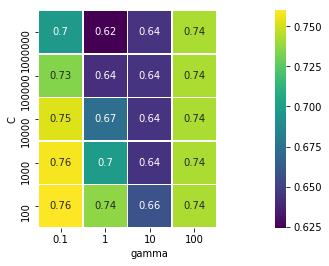

In [56]:
%matplotlib inline

plt.figure(figsize=(5,4))
scores = np.array(results.mean_test_score).reshape(5, 4)
sns.heatmap(scores, linewidths = 0.5 , cmap='viridis', annot=True)
plt.xlabel('gamma')
plt.ylabel('C')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xticks(np.arange(4)+0.5, [0.1, 1, 10, 100])
plt.yticks(np.arange(5)+0.5, [100,1000,10000,100000, 1000000])

##### SVC - linear

In [58]:
grid_search_linear = GridSearchCV(SVC(kernel='linear'), param_grid, cv=3, return_train_score=True, n_jobs = -1)

In [59]:
grid_search_linear.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [100, 1000, 10000, 100000, 1000000], 'gamma': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [60]:
print("Best parameters: {}".format(grid_search_linear.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_linear.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.76


In [62]:
# convert to DataFrame
results_linear = pd.DataFrame(grid_search_linear.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,6.596365,0.953043,0.206286,0.004588,100,0.1,"{'C': 100, 'gamma': 0.1}",0.759635,0.760020,0.759898,0.759851,0.000161,1,0.760974,0.760020,0.760081,0.760359,0.000436
1,3.329298,0.038993,0.263758,0.022418,100,1,"{'C': 100, 'gamma': 1}",0.732759,0.749873,0.728426,0.737020,0.009259,9,0.814007,0.804160,0.808521,0.808896,0.004028
2,1.943637,0.120725,0.216342,0.003985,100,10,"{'C': 100, 'gamma': 10}",0.659229,0.657027,0.659391,0.658549,0.001078,14,0.980969,0.982243,0.980472,0.981228,0.000746
3,1.234600,0.042922,0.369469,0.036628,100,100,"{'C': 100, 'gamma': 100}",0.738844,0.739726,0.748731,0.742432,0.004467,4,1.000000,1.000000,1.000000,1.000000,0.000000
4,14.535922,3.044522,0.192550,0.002029,1000,0.1,"{'C': 1000, 'gamma': 0.1}",0.755578,0.761035,0.757360,0.757991,0.002272,2,0.765795,0.761796,0.762871,0.763487,0.001690


([<matplotlib.axis.YTick at 0x2b905d2e9cf8>,
 <a list of 5 Text yticklabel objects>)

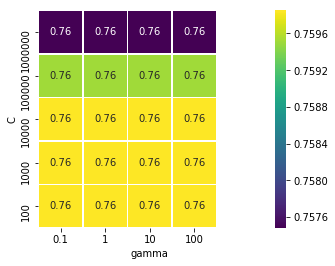

In [64]:
%matplotlib inline

plt.figure(figsize=(5,4))
scores = np.array(results_linear.mean_test_score).reshape(5, 4)
sns.heatmap(scores, linewidths = 0.5 , cmap='viridis', annot=True)
plt.xlabel('gamma')
plt.ylabel('C')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xticks(np.arange(4)+0.5, [0.1, 1, 10, 100])
plt.yticks(np.arange(5)+0.5, [100,1000,10000,100000, 1000000])

##### SVC - polynomial

In [65]:
grid_search_poly = GridSearchCV(SVC(kernel='poly', degree = 2), param_grid, cv=3, return_train_score=True, n_jobs = -1)

In [66]:
grid_search_poly.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [100, 1000, 10000, 100000, 1000000], 'gamma': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [67]:
print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.76


In [68]:
# convert to DataFrame
results_poly = pd.DataFrame(grid_search_poly.cv_results_)
# show the first 5 rows
display(results_poly.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.875568,1.020940,0.160316,0.057383,100,0.1,"{'C': 100, 'gamma': 0.1}",0.759635,0.760020,0.758883,0.759513,0.000472,1,0.759959,0.759767,0.760081,0.759936,0.000129
1,263.753013,10.241706,0.096876,0.000653,100,1,"{'C': 100, 'gamma': 1}",0.757606,0.760020,0.756853,0.758160,0.001351,3,0.763512,0.761289,0.761349,0.762050,0.001034
2,3431.200642,533.321178,0.097169,0.012664,100,10,"{'C': 100, 'gamma': 10}",0.758114,0.756469,0.753807,0.756131,0.001774,9,0.764527,0.763318,0.763885,0.763910,0.000494
3,26272.173627,4492.631993,0.076958,0.001076,100,100,"{'C': 100, 'gamma': 100}",0.746450,0.749366,0.729949,0.741925,0.008548,14,0.764527,0.754693,0.758306,0.759175,0.004061
4,25.561656,13.974300,0.124726,0.010668,1000,0.1,"{'C': 1000, 'gamma': 0.1}",0.758621,0.760020,0.758376,0.759006,0.000724,2,0.761989,0.760274,0.760842,0.761035,0.000713


([<matplotlib.axis.YTick at 0x2b905d22c7b8>,
 <a list of 5 Text yticklabel objects>)

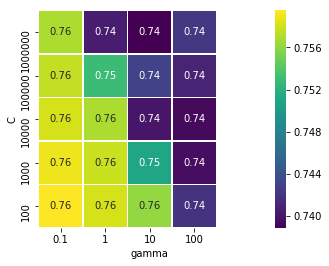

In [69]:
%matplotlib inline

plt.figure(figsize=(5,4))
scores = np.array(results_poly.mean_test_score).reshape(5, 4)
sns.heatmap(scores, linewidths = 0.5 , cmap='viridis', annot=True)
plt.xlabel('gamma')
plt.ylabel('C')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xticks(np.arange(4)+0.5, [0.1, 1, 10, 100])
plt.yticks(np.arange(5)+0.5, [100,1000,10000,100000, 1000000])

In [70]:
scores.mean()

0.7495433789954338

##### Final Model
The best model was Logistic Regressoin with a hyperparameter C = 10 and using L1 regularization

In [74]:
log_l1 = LogisticRegression(penalty = 'l1', C = 10, solver = 'liblinear', max_iter = 5000, random_state=42)
log_l1.fit(X, y)
y_pred = log_l1.predict(X_test)
print(log_l1.score(X_train, y_train))
print(log_l1.score(X_test, y_test))

0.7590055809233891
0.7633536173089925


In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_l1, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.76132522 0.75997295 0.76116373 0.76522327 0.75845737]
Average cross-validation score: 0.76


In [76]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

In [78]:
print("Cross-validation scores:\n{}".format(cross_val_score(log_l1, X, y, cv=kfold)))

Cross-validation scores:
[0.76217532 0.76907468 0.75324675]


In [79]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(log_l1, X, y, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))
print(scores)

Number of cv iterations:  7392
Mean accuracy: 0.76
[1. 1. 1. ... 1. 0. 0.]


In [81]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))


Confusion matrix:
[[   8  337]
 [  13 1121]]


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["Charged Off", "Fully Paid"]))

             precision    recall  f1-score   support

Charged Off       0.38      0.02      0.04       345
 Fully Paid       0.77      0.99      0.86      1134

avg / total       0.68      0.76      0.67      1479

